In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization

In [11]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

In [12]:
for i in range(0,613):
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)

In [13]:
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [14]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [16]:
FF_df[0]

0      0.980720
1      0.980030
2      0.977961
3      0.974512
4      0.969687
         ...   
995   -0.637919
996   -0.637355
997   -0.636854
998   -0.636415
999   -0.636038
Name: 0, Length: 1000, dtype: float64

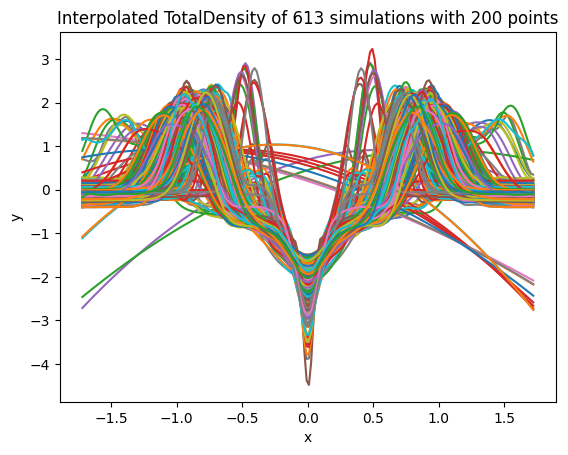

In [7]:
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [22]:
outlier_column_indexes = set([])

index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        outlier_column_indexes.add(index)
#        print(index)
    index = index + 1
    
#print('')
index = 0 
for value in TD_y_df.iloc[5]:
    if value > 0.30:
        outlier_column_indexes.add(index)
#        print(index)
    index = index + 1

#print('')
index = 0 
for value in TD_y_df.iloc[15]:
    if value > 0.30:
        outlier_column_indexes.add(index)
#        print(index)
    index = index + 1

print(outlier_column_indexes)
print(len(outlier_column_indexes))

{387, 261, 10, 16, 277, 24, 32, 34, 419, 37, 551, 43, 430, 303, 311, 583, 78, 82, 89, 221, 353, 364, 118, 252}
24


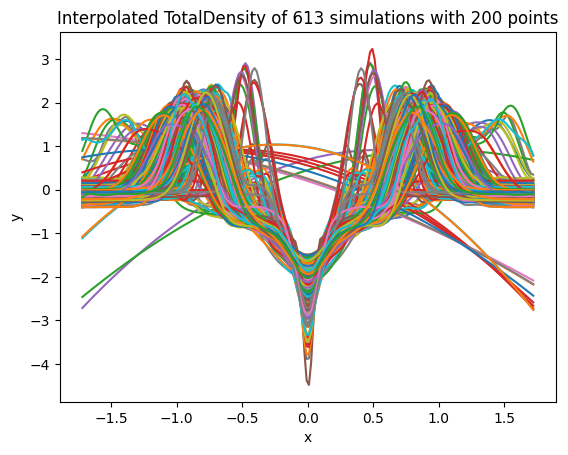

In [18]:
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [23]:
FF_df = FF_df.drop(outlier_column_indexes, axis=1)
TD_x_df = TD_x_df.drop(outlier_column_indexes, axis=1)
TD_y_df = TD_y_df.drop(outlier_column_indexes, axis=1)

In [24]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [24]:
for i in TD_y_df.columns:
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)

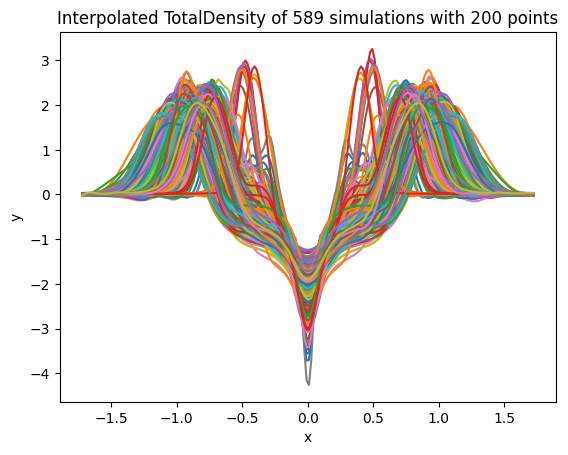

In [25]:
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [26]:
def loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    number = 10
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    prediction = model.predict(test_input_values)
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show()
    
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)

In [27]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-1.719098,0.000033,-1.719098,0.010057,-1.719098,0.002887,-1.719098,0.009233,-1.719098,-0.005313,...,-1.719098,0.001498,-1.719098,0.008311,-1.719098,-0.003606,-1.719098,-0.000929,-1.719098,-0.030157
1,-1.701821,0.005281,-1.701821,0.005045,-1.701821,0.002097,-1.701821,0.002070,-1.701821,0.003170,...,-1.701821,0.001285,-1.701821,0.019183,-1.701821,0.001995,-1.701821,0.001921,-1.701821,0.012406
2,-1.684543,0.007669,-1.684543,-0.000403,-1.684543,0.001040,-1.684543,-0.001849,-1.684543,0.006195,...,-1.684543,0.000929,-1.684543,0.016279,-1.684543,0.004938,-1.684543,0.003077,-1.684543,0.036242
3,-1.667266,0.008989,-1.667266,-0.003850,-1.667266,0.000266,-1.667266,-0.003323,-1.667266,0.006168,...,-1.667266,0.000802,-1.667266,0.009266,-1.667266,0.006368,-1.667266,0.003261,-1.667266,0.045904
4,-1.649989,0.009950,-1.649989,-0.004699,-1.649989,-0.000087,-1.649989,-0.003178,-1.649989,0.004777,...,-1.649989,0.000999,-1.649989,0.003950,-1.649989,0.006804,-1.649989,0.003007,-1.649989,0.045806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,0.008359,1.649989,-0.004231,1.649989,0.001067,1.649989,-0.003170,1.649989,0.003185,...,1.649989,0.000340,1.649989,0.021663,1.649989,0.004075,1.649989,0.002616,1.649989,0.029559
196,1.667266,0.007649,1.667266,-0.002702,1.667266,0.002124,1.667266,-0.003536,1.667266,0.004131,...,1.667266,0.000688,1.667266,0.021436,1.667266,-0.002769,1.667266,0.003015,1.667266,0.033099
197,1.684543,0.006775,1.684543,-0.001992,1.684543,0.002720,1.684543,-0.004670,1.684543,0.005269,...,1.684543,0.000980,1.684543,0.017806,1.684543,-0.007580,1.684543,0.003085,1.684543,0.035655
198,1.701821,0.004961,1.701821,-0.003726,1.701821,0.001607,1.701821,-0.006792,1.701821,0.005848,...,1.701821,0.000703,1.701821,0.008904,1.701821,-0.006880,1.701821,0.002310,1.701821,0.035493


In [28]:
input_data = FF_df.iloc[: , :-14]
output_data = TD_df.iloc[: , :-28]

In [29]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,598
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.537854,-0.345675,-0.635462,-0.711578,0.048040,-0.321485,0.954038,-0.671184,-0.170736,-0.112200
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.538258,-0.346067,-0.635859,-0.711196,0.047498,-0.321904,0.953268,-0.671651,-0.171363,-0.112708
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.539469,-0.347245,-0.637050,-0.710050,0.045873,-0.323160,0.950959,-0.673053,-0.173246,-0.114231
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.541488,-0.349207,-0.639033,-0.708140,0.043164,-0.325254,0.947112,-0.675387,-0.176383,-0.116770
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.544312,-0.351953,-0.641809,-0.705467,0.039373,-0.328185,0.941730,-0.678654,-0.180771,-0.120322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.748329,-0.706715,-0.756919,-0.767718,-0.697094,-0.682520,-0.714481,-0.655735,-0.748767,-0.792347
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.749191,-0.706998,-0.755730,-0.766618,-0.699303,-0.682503,-0.720644,-0.655795,-0.750661,-0.792153
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.750055,-0.707287,-0.754544,-0.765530,-0.701556,-0.682487,-0.726844,-0.655902,-0.752505,-0.791958
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.750920,-0.707582,-0.753362,-0.764456,-0.703852,-0.682471,-0.733076,-0.656056,-0.754297,-0.791761


In [30]:
output_data

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,594x,594y,595x,595y,596x,596y,597x,597y,598x,598y
0,-1.719098,0.000033,-1.719098,0.010057,-1.719098,0.002887,-1.719098,0.009233,-1.719098,-0.005313,...,-1.719098,0.001656,-1.719098,0.002309,-1.719098,0.023953,-1.719098,-0.001095,-1.719098,-0.004178
1,-1.701821,0.005281,-1.701821,0.005045,-1.701821,0.002097,-1.701821,0.002070,-1.701821,0.003170,...,-1.701821,0.001930,-1.701821,-0.000298,-1.701821,0.003527,-1.701821,0.015405,-1.701821,0.001227
2,-1.684543,0.007669,-1.684543,-0.000403,-1.684543,0.001040,-1.684543,-0.001849,-1.684543,0.006195,...,-1.684543,0.002149,-1.684543,-0.001642,-1.684543,-0.003363,-1.684543,0.018987,-1.684543,0.005227
3,-1.667266,0.008989,-1.667266,-0.003850,-1.667266,0.000266,-1.667266,-0.003323,-1.667266,0.006168,...,-1.667266,0.002471,-1.667266,-0.001039,-1.667266,-0.002395,-1.667266,0.016628,-1.667266,0.008996
4,-1.649989,0.009950,-1.649989,-0.004699,-1.649989,-0.000087,-1.649989,-0.003178,-1.649989,0.004777,...,-1.649989,0.002964,-1.649989,0.000178,-1.649989,0.001765,-1.649989,0.012804,-1.649989,0.013212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,0.008359,1.649989,-0.004231,1.649989,0.001067,1.649989,-0.003170,1.649989,0.003185,...,1.649989,0.003993,1.649989,-0.006405,1.649989,0.008122,1.649989,0.021414,1.649989,0.009899
196,1.667266,0.007649,1.667266,-0.002702,1.667266,0.002124,1.667266,-0.003536,1.667266,0.004131,...,1.667266,0.003323,1.667266,-0.006060,1.667266,0.006626,1.667266,0.019341,1.667266,0.006148
197,1.684543,0.006775,1.684543,-0.001992,1.684543,0.002720,1.684543,-0.004670,1.684543,0.005269,...,1.684543,0.002365,1.684543,-0.001278,1.684543,0.001608,1.684543,0.014593,1.684543,0.004102
198,1.701821,0.004961,1.701821,-0.003726,1.701821,0.001607,1.701821,-0.006792,1.701821,0.005848,...,1.701821,0.000867,1.701821,0.003667,1.701821,-0.008243,1.701821,0.008029,1.701821,0.003770


In [31]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,460)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[125, 28, 296, 264, 240, 153, 114, 581, 99, 454, 38, 35, 105, 235, 250, 539, 30, 214, 451, 237, 481, 299, 6, 174, 589, 367, 576, 170, 232, 362, 592, 104, 409, 109, 386, 371, 285, 51, 492, 138, 407, 90, 317, 390, 207, 79, 53, 245, 313, 91, 584, 113, 565, 571, 486, 393, 177, 399, 382, 226, 288, 81, 186, 595, 93, 248, 205, 149, 528, 495, 344, 562, 300, 123, 369, 540, 453, 413, 417, 31, 128, 442, 18, 434, 172, 216, 148, 39, 119, 489, 504, 306, 470, 563, 512, 508, 352, 269, 213, 474, 490, 346, 246, 535, 146, 552, 137, 401, 302, 290, 145, 402, 316, 231, 577, 315, 215, 196, 523, 77, 274, 266, 550, 406, 27, 462, 63, 87, 338, 547, 426, 572, 228, 322, 588, 208, 206, 463, 251, 561, 139, 298, 5, 465, 389, 65, 368, 289, 404, 147, 519, 345, 185, 64, 161, 234, 556, 244, 1, 452, 388, 542, 270, 410, 101, 273, 61, 337, 163, 526, 431, 328, 111, 469, 202, 433, 92, 291, 286, 0, 323, 176, 533, 9, 443, 479, 168, 133, 33, 134, 505, 47, 50, 394, 262, 41, 287, 71, 72, 355, 256, 596, 94, 559, 457, 327, 464, 501,

In [32]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(460, 1000)
(460, 400, 1)
(115, 1000)
(115, 400, 1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0     

Epoch 142/1500
8/8 [==============================] - 1s 104ms/step - loss: 0.0853 - val_loss: 0.1103
Epoch 143/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0867 - val_loss: 0.1062
Epoch 144/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0815 - val_loss: 0.1069
Epoch 145/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0810 - val_loss: 0.1104
Epoch 146/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0835 - val_loss: 0.1059
Epoch 147/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0858 - val_loss: 0.1111
Epoch 148/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0851 - val_loss: 0.1076
Epoch 149/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0821 - val_loss: 0.1043
Epoch 150/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0817 - val_loss: 0.1048
Epoch 151/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0792

8/8 [==============================] - 1s 104ms/step - loss: 0.0546 - val_loss: 0.0971
Epoch 303/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0553 - val_loss: 0.1004
Epoch 304/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0552 - val_loss: 0.0980
Epoch 305/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0590 - val_loss: 0.1011
Epoch 306/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0591 - val_loss: 0.0960
Epoch 307/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0664 - val_loss: 0.1018
Epoch 308/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0577 - val_loss: 0.1021
Epoch 309/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0582 - val_loss: 0.1030
Epoch 310/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0598 - val_loss: 0.1028
Epoch 311/1500
8/8 [==============================] - 4s 538ms/step - loss: 0.0551 - val_loss: 0.

8/8 [==============================] - 1s 110ms/step - loss: 0.0441 - val_loss: 0.1064
Epoch 463/1500
8/8 [==============================] - 1s 105ms/step - loss: 0.0430 - val_loss: 0.1035
Epoch 464/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0436 - val_loss: 0.0968
Epoch 465/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0479 - val_loss: 0.0962
Epoch 466/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0437 - val_loss: 0.1008
Epoch 467/1500
8/8 [==============================] - 1s 104ms/step - loss: 0.0448 - val_loss: 0.1050
Epoch 468/1500
8/8 [==============================] - 1s 99ms/step - loss: 0.0425 - val_loss: 0.1017
Epoch 469/1500
8/8 [==============================] - 1s 103ms/step - loss: 0.0447 - val_loss: 0.0954
Epoch 470/1500
8/8 [==============================] - 3s 398ms/step - loss: 0.0415 - val_loss: 0.0995
Epoch 471/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0410 - val_loss: 0.0

8/8 [==============================] - 1s 105ms/step - loss: 0.0468 - val_loss: 0.0995
Epoch 623/1500
8/8 [==============================] - 1s 104ms/step - loss: 0.0373 - val_loss: 0.0956
Epoch 624/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0362 - val_loss: 0.0969
Epoch 625/1500
8/8 [==============================] - 1s 99ms/step - loss: 0.0367 - val_loss: 0.0999
Epoch 626/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0379 - val_loss: 0.0994
Epoch 627/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0373 - val_loss: 0.1030
Epoch 628/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0371 - val_loss: 0.0958
Epoch 629/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0427 - val_loss: 0.1029
Epoch 630/1500
8/8 [==============================] - 2s 261ms/step - loss: 0.0445 - val_loss: 0.0973
Epoch 631/1500
8/8 [==============================] - 4s 581ms/step - loss: 0.0364 - val_loss: 0.0

8/8 [==============================] - 1s 101ms/step - loss: 0.0328 - val_loss: 0.1046
Epoch 783/1500
8/8 [==============================] - 1s 130ms/step - loss: 0.0354 - val_loss: 0.1020
Epoch 784/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0356 - val_loss: 0.0991
Epoch 785/1500
8/8 [==============================] - 1s 104ms/step - loss: 0.0366 - val_loss: 0.0977
Epoch 786/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0367 - val_loss: 0.0880
Epoch 787/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0359 - val_loss: 0.1020
Epoch 788/1500
8/8 [==============================] - 1s 105ms/step - loss: 0.0408 - val_loss: 0.1072
Epoch 789/1500
8/8 [==============================] - 1s 100ms/step - loss: 0.0387 - val_loss: 0.0985
Epoch 790/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0401 - val_loss: 0.0959
Epoch 791/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0317 - val_loss: 0.

8/8 [==============================] - 1s 104ms/step - loss: 0.0333 - val_loss: 0.1023
Epoch 943/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0334 - val_loss: 0.1084
Epoch 944/1500
8/8 [==============================] - 1s 106ms/step - loss: 0.0360 - val_loss: 0.1055
Epoch 945/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0344 - val_loss: 0.0954
Epoch 946/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0327 - val_loss: 0.1001
Epoch 947/1500
8/8 [==============================] - 1s 99ms/step - loss: 0.0371 - val_loss: 0.0986
Epoch 948/1500
8/8 [==============================] - 1s 102ms/step - loss: 0.0371 - val_loss: 0.1006
Epoch 949/1500
8/8 [==============================] - 2s 228ms/step - loss: 0.0360 - val_loss: 0.0978
Epoch 950/1500
8/8 [==============================] - 1s 101ms/step - loss: 0.0341 - val_loss: 0.1012
Epoch 951/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0335 - val_loss: 0.0

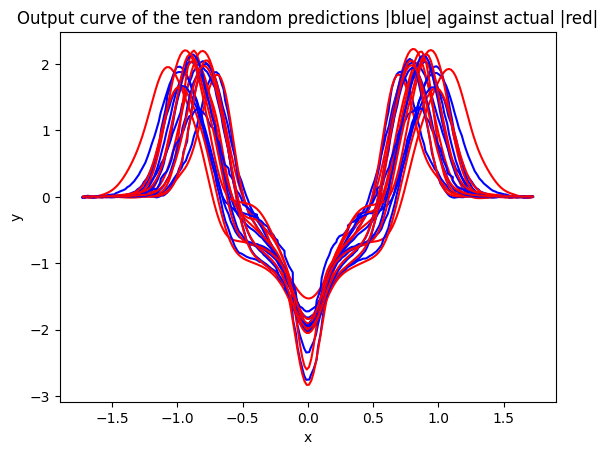

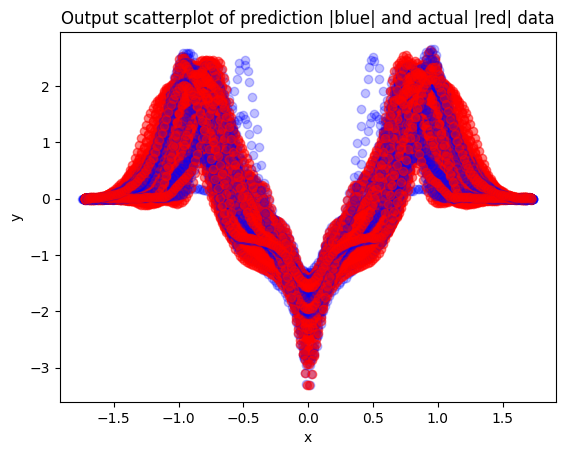

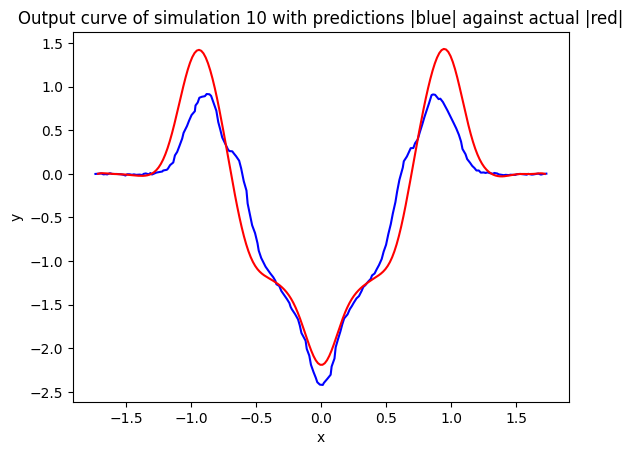

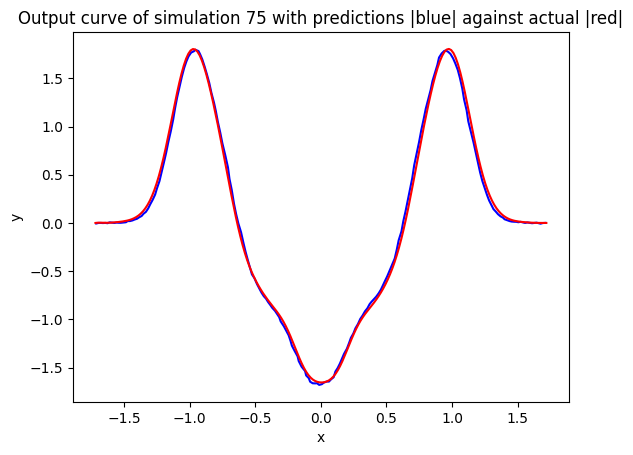

4/4 [==============================] - 0s 8ms/step


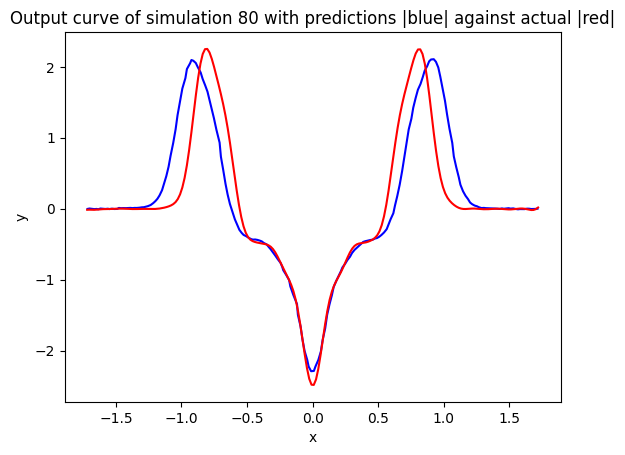

In [21]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_7_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              2002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_2 (Dropout)         (None, 2000)              0     

Epoch 147/1500
8/8 [==============================] - 2s 217ms/step - loss: 0.0900 - val_loss: 0.1121
Epoch 148/1500
8/8 [==============================] - 2s 216ms/step - loss: 0.0885 - val_loss: 0.1164
Epoch 149/1500
8/8 [==============================] - 3s 341ms/step - loss: 0.0928 - val_loss: 0.1152
Epoch 150/1500
8/8 [==============================] - 2s 220ms/step - loss: 0.0914 - val_loss: 0.1172
Epoch 151/1500
8/8 [==============================] - 4s 537ms/step - loss: 0.0926 - val_loss: 0.1129
Epoch 152/1500
8/8 [==============================] - 2s 215ms/step - loss: 0.0917 - val_loss: 0.1107
Epoch 153/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0893 - val_loss: 0.1120
Epoch 154/1500
8/8 [==============================] - 2s 221ms/step - loss: 0.0907 - val_loss: 0.1111
Epoch 155/1500
8/8 [==============================] - 2s 220ms/step - loss: 0.0869 - val_loss: 0.1086
Epoch 156/1500
8/8 [==============================] - 2s 217ms/step - loss: 0.0888

8/8 [==============================] - 2s 214ms/step - loss: 0.0688 - val_loss: 0.1010
Epoch 308/1500
8/8 [==============================] - 2s 215ms/step - loss: 0.0703 - val_loss: 0.0993
Epoch 309/1500
8/8 [==============================] - 2s 212ms/step - loss: 0.0739 - val_loss: 0.0996
Epoch 310/1500
8/8 [==============================] - 2s 200ms/step - loss: 0.0722 - val_loss: 0.1069
Epoch 311/1500
8/8 [==============================] - 4s 522ms/step - loss: 0.0709 - val_loss: 0.0978
Epoch 312/1500
8/8 [==============================] - 2s 212ms/step - loss: 0.0718 - val_loss: 0.1032
Epoch 313/1500
8/8 [==============================] - 2s 220ms/step - loss: 0.0701 - val_loss: 0.0972
Epoch 314/1500
8/8 [==============================] - 2s 201ms/step - loss: 0.0730 - val_loss: 0.1007
Epoch 315/1500
8/8 [==============================] - 2s 210ms/step - loss: 0.0686 - val_loss: 0.1022
Epoch 316/1500
8/8 [==============================] - 2s 219ms/step - loss: 0.0699 - val_loss: 0.

8/8 [==============================] - 2s 308ms/step - loss: 0.0605 - val_loss: 0.0934
Epoch 468/1500
8/8 [==============================] - 2s 272ms/step - loss: 0.0621 - val_loss: 0.0991
Epoch 469/1500
8/8 [==============================] - 2s 257ms/step - loss: 0.0663 - val_loss: 0.0963
Epoch 470/1500
8/8 [==============================] - 2s 279ms/step - loss: 0.0643 - val_loss: 0.0948
Epoch 471/1500
8/8 [==============================] - 5s 637ms/step - loss: 0.0625 - val_loss: 0.0997
Epoch 472/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0596 - val_loss: 0.0971
Epoch 473/1500
8/8 [==============================] - 2s 207ms/step - loss: 0.0612 - val_loss: 0.0959
Epoch 474/1500
8/8 [==============================] - 2s 214ms/step - loss: 0.0619 - val_loss: 0.0974
Epoch 475/1500
8/8 [==============================] - 2s 208ms/step - loss: 0.0586 - val_loss: 0.1027
Epoch 476/1500
8/8 [==============================] - 2s 220ms/step - loss: 0.0608 - val_loss: 0.

8/8 [==============================] - 2s 213ms/step - loss: 0.0558 - val_loss: 0.0988
Epoch 628/1500
8/8 [==============================] - 2s 210ms/step - loss: 0.0579 - val_loss: 0.0992
Epoch 629/1500
8/8 [==============================] - 2s 224ms/step - loss: 0.0591 - val_loss: 0.0964
Epoch 630/1500
8/8 [==============================] - 2s 212ms/step - loss: 0.0562 - val_loss: 0.0943
Epoch 631/1500
8/8 [==============================] - 4s 510ms/step - loss: 0.0538 - val_loss: 0.0917
Epoch 632/1500
8/8 [==============================] - 2s 215ms/step - loss: 0.0540 - val_loss: 0.0917
Epoch 633/1500
8/8 [==============================] - 2s 212ms/step - loss: 0.0530 - val_loss: 0.0948
Epoch 634/1500
8/8 [==============================] - 3s 359ms/step - loss: 0.0551 - val_loss: 0.0957
Epoch 635/1500
8/8 [==============================] - 2s 211ms/step - loss: 0.0540 - val_loss: 0.0920
Epoch 636/1500
8/8 [==============================] - 2s 201ms/step - loss: 0.0555 - val_loss: 0.

8/8 [==============================] - 2s 220ms/step - loss: 0.0552 - val_loss: 0.1000
Epoch 788/1500
8/8 [==============================] - 2s 215ms/step - loss: 0.0548 - val_loss: 0.0986
Epoch 789/1500
8/8 [==============================] - 2s 213ms/step - loss: 0.0546 - val_loss: 0.0943
Epoch 790/1500
8/8 [==============================] - 2s 200ms/step - loss: 0.0533 - val_loss: 0.0956
Epoch 791/1500
8/8 [==============================] - 4s 526ms/step - loss: 0.0544 - val_loss: 0.0893
Epoch 792/1500
8/8 [==============================] - 2s 211ms/step - loss: 0.0569 - val_loss: 0.0917
Epoch 793/1500
8/8 [==============================] - 2s 222ms/step - loss: 0.0577 - val_loss: 0.0958
Epoch 794/1500
8/8 [==============================] - 2s 201ms/step - loss: 0.0575 - val_loss: 0.0936
Epoch 795/1500
8/8 [==============================] - 2s 213ms/step - loss: 0.0596 - val_loss: 0.0946
Epoch 796/1500
8/8 [==============================] - 2s 223ms/step - loss: 0.0597 - val_loss: 0.

8/8 [==============================] - 2s 214ms/step - loss: 0.0532 - val_loss: 0.0975
Epoch 948/1500
8/8 [==============================] - 2s 220ms/step - loss: 0.0550 - val_loss: 0.0998
Epoch 949/1500
8/8 [==============================] - 2s 218ms/step - loss: 0.0540 - val_loss: 0.0898
Epoch 950/1500
8/8 [==============================] - 2s 305ms/step - loss: 0.0524 - val_loss: 0.0947
Epoch 951/1500
8/8 [==============================] - 5s 656ms/step - loss: 0.0536 - val_loss: 0.0958
Epoch 952/1500
8/8 [==============================] - 2s 283ms/step - loss: 0.0554 - val_loss: 0.0967
Epoch 953/1500
8/8 [==============================] - 2s 258ms/step - loss: 0.0541 - val_loss: 0.0928
Epoch 954/1500
8/8 [==============================] - 2s 258ms/step - loss: 0.0523 - val_loss: 0.0976
Epoch 955/1500
8/8 [==============================] - 2s 275ms/step - loss: 0.0497 - val_loss: 0.0899
Epoch 956/1500
8/8 [==============================] - 2s 265ms/step - loss: 0.0498 - val_loss: 0.

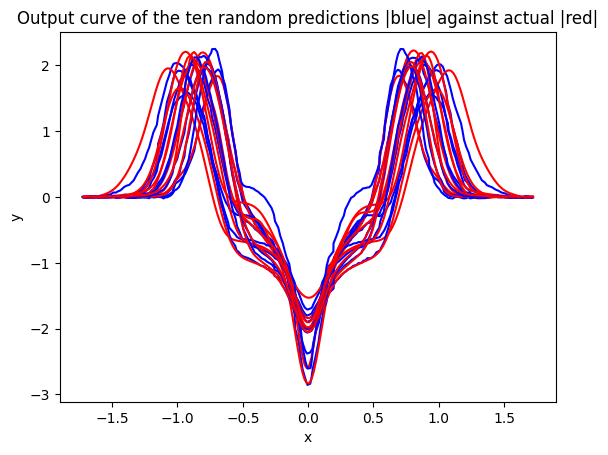

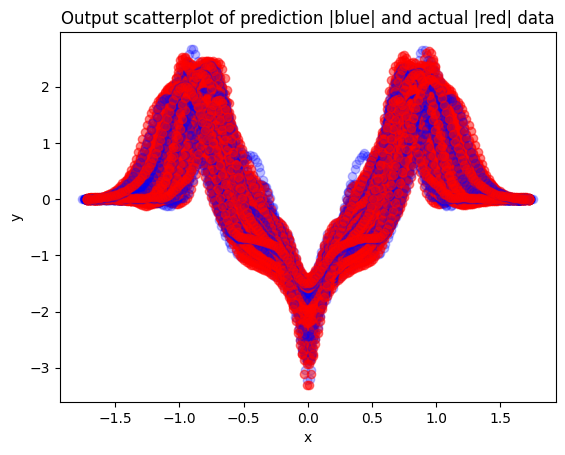

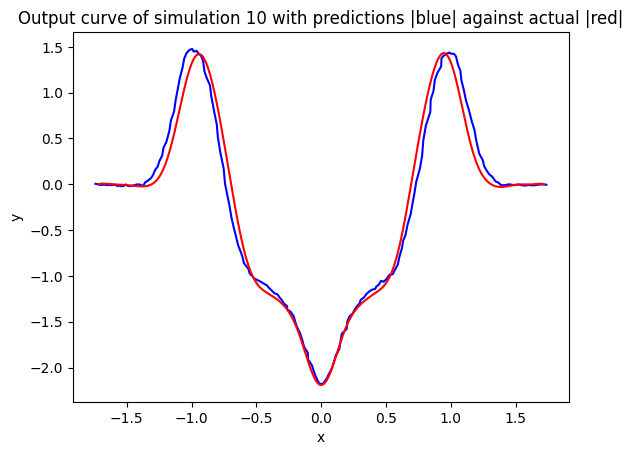

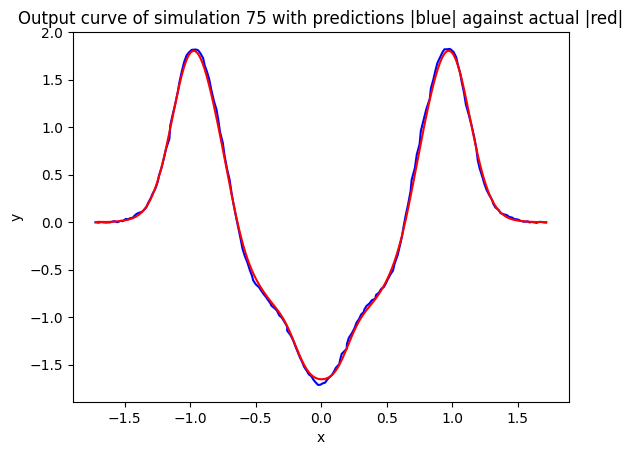

4/4 [==============================] - 0s 35ms/step


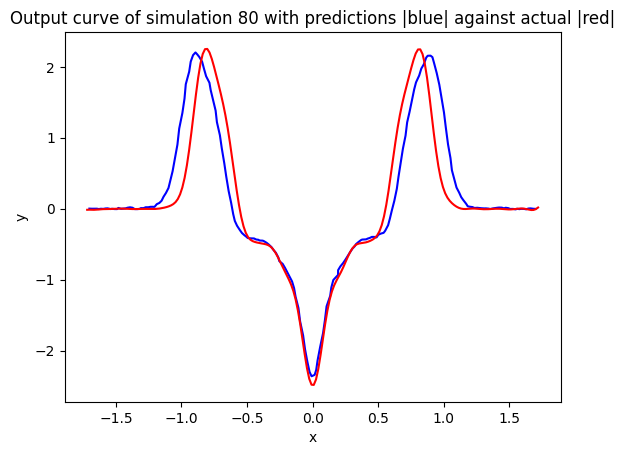

In [33]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_7_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              2002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0         
                                                                 
 dense_7 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_5 (Dropout)         (None, 2000)              0   

Epoch 143/1500
8/8 [==============================] - 2s 271ms/step - loss: 0.1038 - val_loss: 0.1174
Epoch 144/1500
8/8 [==============================] - 2s 270ms/step - loss: 0.1024 - val_loss: 0.1192
Epoch 145/1500
8/8 [==============================] - 2s 268ms/step - loss: 0.1027 - val_loss: 0.1142
Epoch 146/1500
8/8 [==============================] - 2s 268ms/step - loss: 0.1023 - val_loss: 0.1146
Epoch 147/1500
8/8 [==============================] - 2s 269ms/step - loss: 0.1005 - val_loss: 0.1184
Epoch 148/1500
8/8 [==============================] - 2s 257ms/step - loss: 0.1022 - val_loss: 0.1160
Epoch 149/1500
8/8 [==============================] - 2s 267ms/step - loss: 0.1031 - val_loss: 0.1153
Epoch 150/1500
8/8 [==============================] - 2s 260ms/step - loss: 0.1028 - val_loss: 0.1190
Epoch 151/1500
8/8 [==============================] - 5s 659ms/step - loss: 0.0977 - val_loss: 0.1117
Epoch 152/1500
8/8 [==============================] - 2s 274ms/step - loss: 0.1006

8/8 [==============================] - 2s 267ms/step - loss: 0.0934 - val_loss: 0.1145
Epoch 304/1500
8/8 [==============================] - 2s 268ms/step - loss: 0.0965 - val_loss: 0.1170
Epoch 305/1500
8/8 [==============================] - 2s 271ms/step - loss: 0.0948 - val_loss: 0.1170
Epoch 306/1500
8/8 [==============================] - 2s 270ms/step - loss: 0.0954 - val_loss: 0.1125
Epoch 307/1500
8/8 [==============================] - 2s 267ms/step - loss: 0.0938 - val_loss: 0.1123
Epoch 308/1500
8/8 [==============================] - 2s 258ms/step - loss: 0.0919 - val_loss: 0.1110
Epoch 309/1500
8/8 [==============================] - 2s 270ms/step - loss: 0.0910 - val_loss: 0.1148
Epoch 310/1500
8/8 [==============================] - 2s 268ms/step - loss: 0.0911 - val_loss: 0.1144
Epoch 311/1500
8/8 [==============================] - 5s 661ms/step - loss: 0.0970 - val_loss: 0.1145
Epoch 312/1500
8/8 [==============================] - 3s 413ms/step - loss: 0.0922 - val_loss: 0.

8/8 [==============================] - 3s 390ms/step - loss: 0.0818 - val_loss: 0.1075
Epoch 464/1500
8/8 [==============================] - 3s 331ms/step - loss: 0.0807 - val_loss: 0.1025
Epoch 465/1500
8/8 [==============================] - 3s 325ms/step - loss: 0.0834 - val_loss: 0.1067
Epoch 466/1500
8/8 [==============================] - 2s 312ms/step - loss: 0.0812 - val_loss: 0.1079
Epoch 467/1500
8/8 [==============================] - 2s 301ms/step - loss: 0.0820 - val_loss: 0.1100
Epoch 468/1500
8/8 [==============================] - 2s 305ms/step - loss: 0.0845 - val_loss: 0.1073
Epoch 469/1500
8/8 [==============================] - 2s 285ms/step - loss: 0.0880 - val_loss: 0.1137
Epoch 470/1500
8/8 [==============================] - 2s 298ms/step - loss: 0.0837 - val_loss: 0.1097
Epoch 471/1500
8/8 [==============================] - 5s 666ms/step - loss: 0.0864 - val_loss: 0.1093
Epoch 472/1500
8/8 [==============================] - 2s 271ms/step - loss: 0.0903 - val_loss: 0.

8/8 [==============================] - 3s 359ms/step - loss: 0.0800 - val_loss: 0.1063
Epoch 624/1500
8/8 [==============================] - 3s 328ms/step - loss: 0.0800 - val_loss: 0.1038
Epoch 625/1500
8/8 [==============================] - 3s 412ms/step - loss: 0.0799 - val_loss: 0.1073
Epoch 626/1500
8/8 [==============================] - 3s 321ms/step - loss: 0.0796 - val_loss: 0.1059
Epoch 627/1500
8/8 [==============================] - 3s 324ms/step - loss: 0.0815 - val_loss: 0.1008
Epoch 628/1500
8/8 [==============================] - 2s 320ms/step - loss: 0.0839 - val_loss: 0.1098
Epoch 629/1500
8/8 [==============================] - 2s 321ms/step - loss: 0.0784 - val_loss: 0.1070
Epoch 630/1500
8/8 [==============================] - 3s 341ms/step - loss: 0.0810 - val_loss: 0.1054
Epoch 631/1500
8/8 [==============================] - 8s 1s/step - loss: 0.0801 - val_loss: 0.1093
Epoch 632/1500
8/8 [==============================] - 3s 413ms/step - loss: 0.0804 - val_loss: 0.109

8/8 [==============================] - 3s 352ms/step - loss: 0.0729 - val_loss: 0.1008
Epoch 784/1500
8/8 [==============================] - 3s 386ms/step - loss: 0.0711 - val_loss: 0.1039
Epoch 785/1500
8/8 [==============================] - 3s 390ms/step - loss: 0.0710 - val_loss: 0.0994
Epoch 786/1500
8/8 [==============================] - 3s 440ms/step - loss: 0.0752 - val_loss: 0.1031
Epoch 787/1500
8/8 [==============================] - 4s 451ms/step - loss: 0.0750 - val_loss: 0.1077
Epoch 788/1500
8/8 [==============================] - 4s 532ms/step - loss: 0.0757 - val_loss: 0.1056
Epoch 789/1500
8/8 [==============================] - 3s 433ms/step - loss: 0.0766 - val_loss: 0.1034
Epoch 790/1500
8/8 [==============================] - 3s 447ms/step - loss: 0.0762 - val_loss: 0.1015
Epoch 791/1500
8/8 [==============================] - 8s 1s/step - loss: 0.0758 - val_loss: 0.1024
Epoch 792/1500
8/8 [==============================] - 3s 347ms/step - loss: 0.0781 - val_loss: 0.097

8/8 [==============================] - 3s 342ms/step - loss: 0.0719 - val_loss: 0.1070
Epoch 944/1500
8/8 [==============================] - 3s 364ms/step - loss: 0.0753 - val_loss: 0.1018
Epoch 945/1500
8/8 [==============================] - 3s 344ms/step - loss: 0.0861 - val_loss: 0.1078
Epoch 946/1500
8/8 [==============================] - 3s 352ms/step - loss: 0.0798 - val_loss: 0.1093
Epoch 947/1500
8/8 [==============================] - 3s 347ms/step - loss: 0.0755 - val_loss: 0.1103
Epoch 948/1500
8/8 [==============================] - 3s 342ms/step - loss: 0.0765 - val_loss: 0.1075
Epoch 949/1500
8/8 [==============================] - 3s 338ms/step - loss: 0.0773 - val_loss: 0.1068
Epoch 950/1500
8/8 [==============================] - 3s 351ms/step - loss: 0.0752 - val_loss: 0.1042
Epoch 951/1500
8/8 [==============================] - 6s 804ms/step - loss: 0.0731 - val_loss: 0.0996
Epoch 952/1500
8/8 [==============================] - 3s 323ms/step - loss: 0.0746 - val_loss: 0.

8/8 [==============================] - 2s 259ms/step - loss: 0.0755 - val_loss: 0.1051
Epoch 1103/1500
8/8 [==============================] - 2s 268ms/step - loss: 0.0727 - val_loss: 0.1015
Epoch 1104/1500
8/8 [==============================] - 2s 266ms/step - loss: 0.0743 - val_loss: 0.0984
Epoch 1105/1500
8/8 [==============================] - 2s 308ms/step - loss: 0.0781 - val_loss: 0.1090
Epoch 1106/1500
8/8 [==============================] - 3s 426ms/step - loss: 0.0794 - val_loss: 0.1074
Epoch 1107/1500
8/8 [==============================] - 3s 337ms/step - loss: 0.0710 - val_loss: 0.1093
Epoch 1108/1500
8/8 [==============================] - 2s 258ms/step - loss: 0.0714 - val_loss: 0.1089
Epoch 1109/1500
8/8 [==============================] - 2s 252ms/step - loss: 0.0706 - val_loss: 0.1093
Epoch 1110/1500
8/8 [==============================] - 2s 274ms/step - loss: 0.0764 - val_loss: 0.1084
Epoch 1111/1500
8/8 [==============================] - 5s 647ms/step - loss: 0.0704 - val

8/8 [==============================] - 3s 394ms/step - loss: 0.0650 - val_loss: 0.1006
Epoch 1261/1500
8/8 [==============================] - 5s 636ms/step - loss: 0.0618 - val_loss: 0.0978
Epoch 1262/1500
8/8 [==============================] - 2s 262ms/step - loss: 0.0644 - val_loss: 0.0981
Epoch 1263/1500
8/8 [==============================] - 2s 305ms/step - loss: 0.0623 - val_loss: 0.0986
Epoch 1264/1500
8/8 [==============================] - 2s 266ms/step - loss: 0.0658 - val_loss: 0.1036
Epoch 1265/1500
8/8 [==============================] - 2s 260ms/step - loss: 0.0648 - val_loss: 0.1061
Epoch 1266/1500
8/8 [==============================] - 2s 266ms/step - loss: 0.0614 - val_loss: 0.1000
Epoch 1267/1500
8/8 [==============================] - 2s 258ms/step - loss: 0.0677 - val_loss: 0.0961
Epoch 1268/1500
8/8 [==============================] - 2s 250ms/step - loss: 0.0651 - val_loss: 0.0925
Epoch 1269/1500
8/8 [==============================] - 2s 269ms/step - loss: 0.0686 - val

8/8 [==============================] - 3s 380ms/step - loss: 0.0636 - val_loss: 0.1048
Epoch 1419/1500
8/8 [==============================] - 2s 322ms/step - loss: 0.0694 - val_loss: 0.1045
Epoch 1420/1500
8/8 [==============================] - 2s 263ms/step - loss: 0.0651 - val_loss: 0.1019
Epoch 1421/1500
8/8 [==============================] - 6s 811ms/step - loss: 0.0728 - val_loss: 0.1034
Epoch 1422/1500
8/8 [==============================] - 2s 298ms/step - loss: 0.0685 - val_loss: 0.1048
Epoch 1423/1500
8/8 [==============================] - 2s 263ms/step - loss: 0.0628 - val_loss: 0.1016
Epoch 1424/1500
8/8 [==============================] - 2s 260ms/step - loss: 0.0649 - val_loss: 0.1036
Epoch 1425/1500
8/8 [==============================] - 2s 249ms/step - loss: 0.0625 - val_loss: 0.1013
Epoch 1426/1500
8/8 [==============================] - 2s 274ms/step - loss: 0.0647 - val_loss: 0.1058
Epoch 1427/1500
8/8 [==============================] - 2s 269ms/step - loss: 0.0644 - val

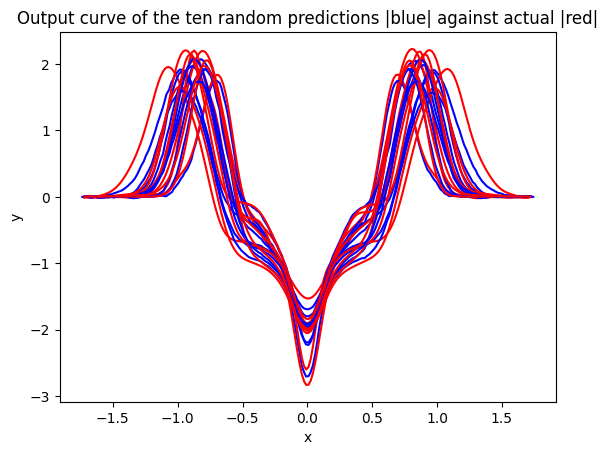

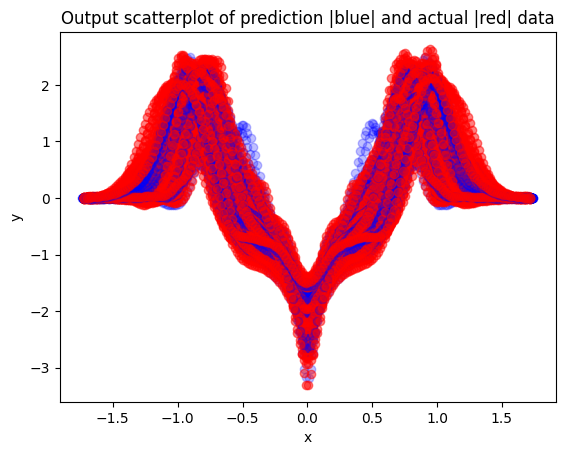

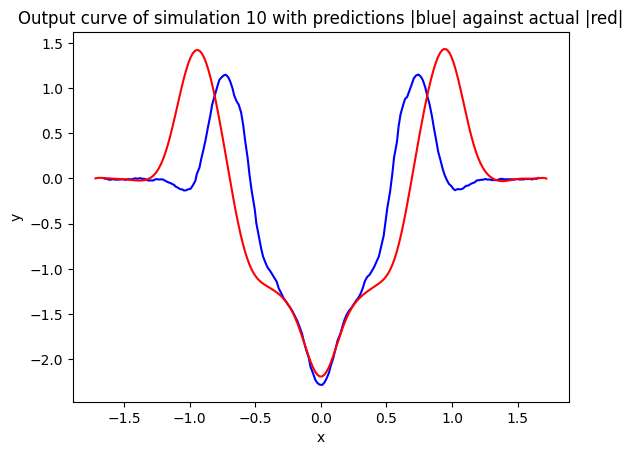

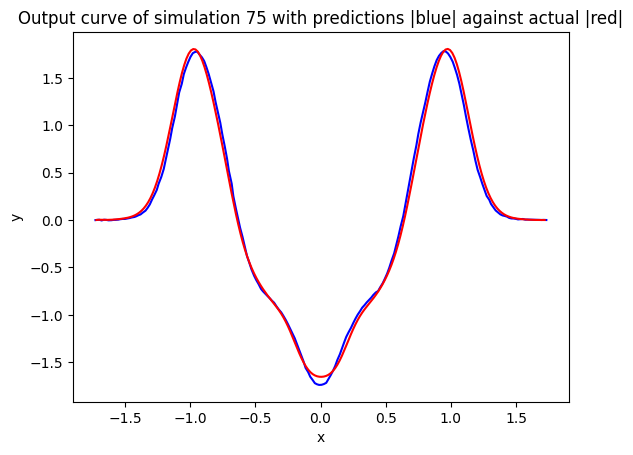

4/4 [==============================] - 0s 16ms/step


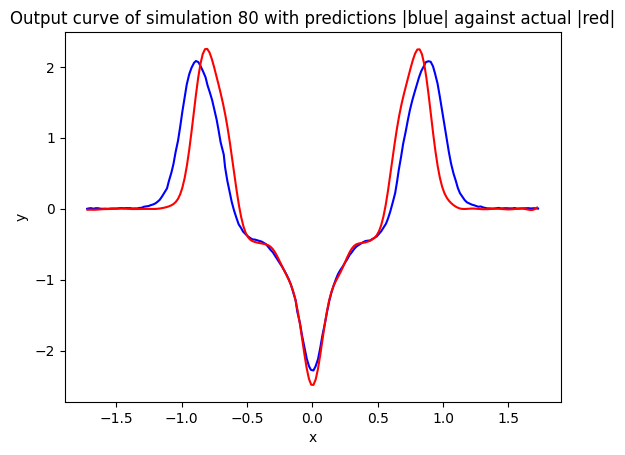

In [34]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=350),
             TensorBoard(log_dir='model_7_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))